In [2]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

In [3]:

# Printing a PersistenceImager() object will print its defining attributes
pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))
print(pimgr)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [4]:

# PersistenceImager() attributes can be adjusted at or after instantiation.
# Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes.
pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 2)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.0, 2.0), pers_range=(0.0, 1.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(20, 10)


In [5]:
# The `fit()` method can be called on one or more (*,2) numpy arrays to automatically determine the miniumum birth and
# persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to
# accomodate the specified pixel size.
pimgr = PersistenceImager(pixel_size=0.5)
pdgms = [np.array([[0.5, 0.8], [0.7, 2.2], [2.5, 4.0]]),
         np.array([[0.1, 0.2], [3.1, 3.3], [1.6, 2.9]]),
         np.array([[0.2, 1.5], [0.4, 0.6], [0.2, 2.6]])]
pimgr.fit(pdgms, skew=True)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.1, 3.1), pers_range=(-8.326672684688674e-17, 2.5), pixel_size=0.5, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(6, 5)


In [6]:
# The `transform()` method can then be called on one or more (*,2) numpy arrays to generate persistence images from diagrams.
# The option `skew=True` specifies that the diagrams are currently in birth-death coordinates and must first be transformed
# to birth-persistence coordinates.
pimgs = pimgr.transform(pdgms, skew=True)
pimgs[0]

array([[0.03999068, 0.05688393, 0.06672051, 0.06341749, 0.04820814],
       [0.04506697, 0.06556791, 0.07809764, 0.07495246, 0.05730671],
       [0.04454486, 0.06674611, 0.08104366, 0.07869919, 0.06058808],
       [0.04113063, 0.0636504 , 0.07884635, 0.07747833, 0.06005714],
       [0.03625436, 0.05757744, 0.07242608, 0.07180125, 0.05593626],
       [0.02922239, 0.04712024, 0.05979033, 0.05956698, 0.04653357]])

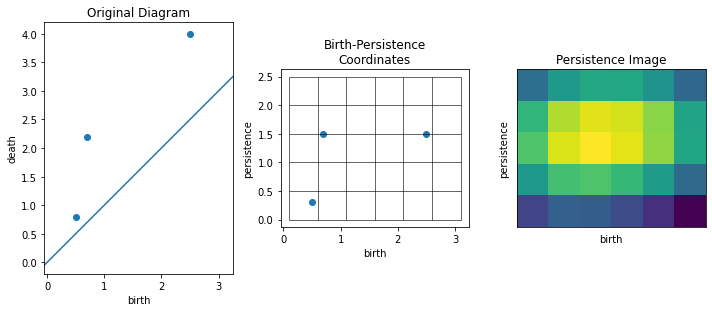

In [7]:
# The `plot_diagram()` and `plot_image()` methods can be used to visualize persistence diagrams and images
fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(pdgms[0], skew=False, ax=axs[0])

axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(pdgms[0], skew=True, ax=axs[1])

axs[2].set_title("Persistence Image")
pimgr.plot_image(pimgs[0], ax=axs[2])

plt.tight_layout()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


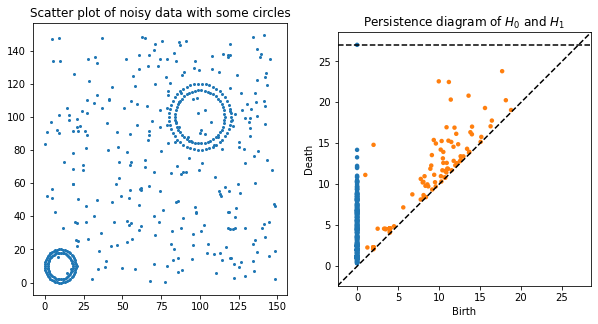

In [8]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

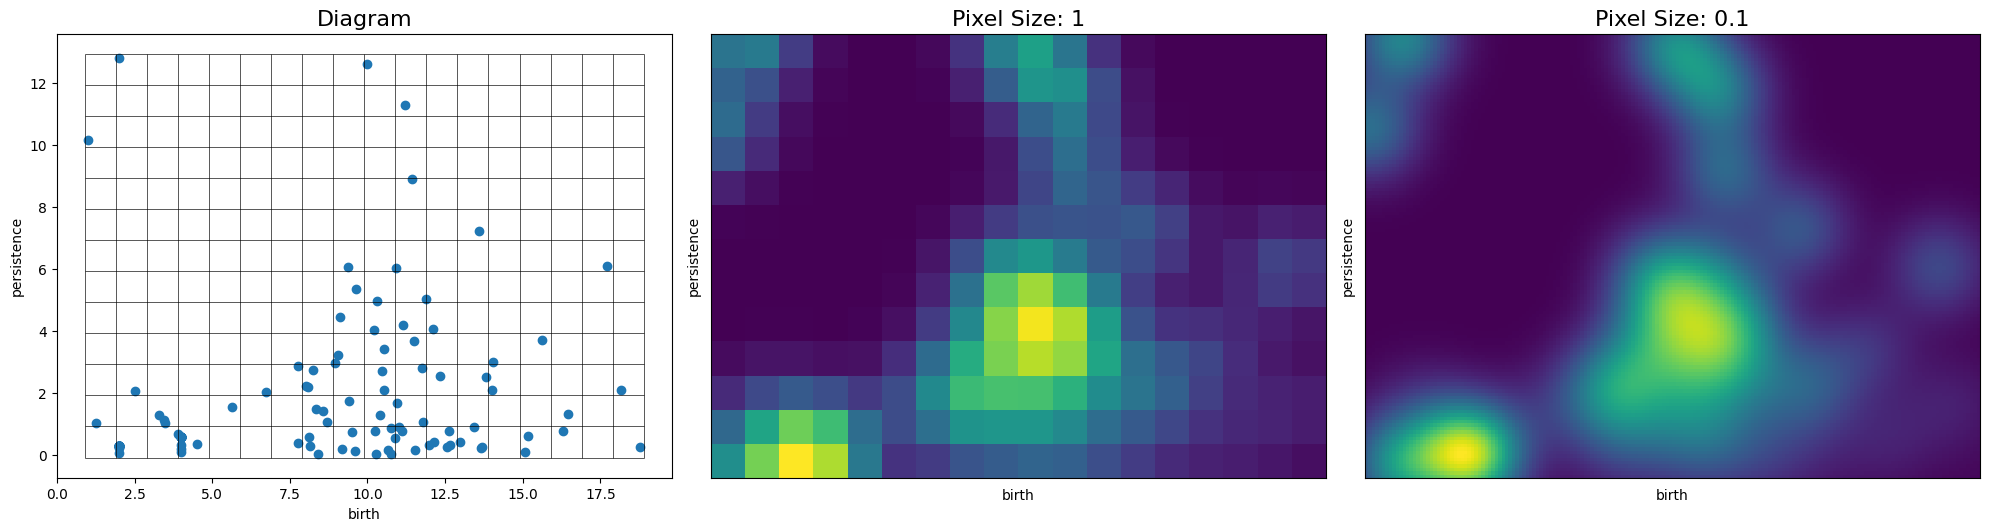

In [9]:
# The resolution of the persistence image is adjusted by choosing the pixel size, given in the same units as the diagram
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.1
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()

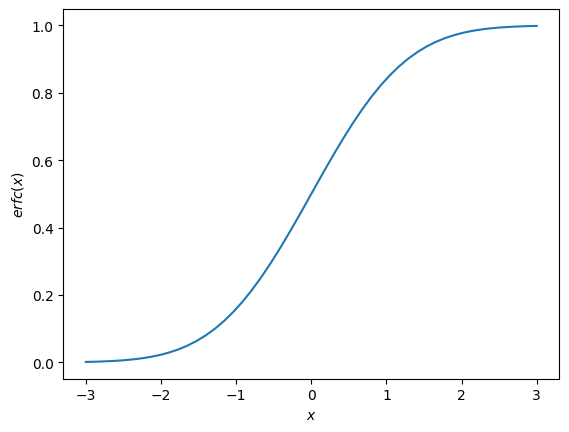

In [14]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
plt.plot(x, special.erfc(-x / np.sqrt(2.0)) / 2.0)
plt.xlabel('$x$')
plt.ylabel('$erfc(x)$')
plt.show()

In [30]:
def norm_cdf(x):
    """ Univariate normal cumulative distribution function (CDF) with mean 0.0 and standard deviation 1.0.
    
    Parameters
    ----------
    x : float
        Value at which to evaluate the CDF (upper limit).
    
    Returns
    -------
    float
        Value of CDF at x, i.e., P(X <= x), for X ~ N[0,1].
    """
    return special.erfc(-x / np.sqrt(2.0)) / 2.0

In [20]:
def persistence(birth, pers, n=1.0):
    """ Continuous monotonic function which weight a persistence pair (b,p) by p^n for some n > 0.
    
    Parameters
    ----------
    birth : (N,) numpy.ndarray
        Birth coordinates of a collection of persistence pairs.
    pers : (N,) numpy.ndarray
        Persistence coordinates of a collection of persistence pairs.
    n : positive float
        Exponent of persistence weighting function.
    
    Returns
    -------
    (N,) numpy.ndarray
        Weights at the persistence pairs.
    """
    return pers ** n

In [46]:
pers_dgm = np.copy(H1_dgm[0:3,:])
pers_dgm[:, 1] = pers_dgm[:, 1] - pers_dgm[:, 0]
pixel_size = .5
birth_range = [min(pers_dgm[:,0]), max(pers_dgm[:,0])]
pers_range = [min(pers_dgm[:,1]), max(pers_dgm[:,1])]

width = birth_range[1] - birth_range[0]
height = pers_range[1] - pers_range[0]
resolution = (int(width/pixel_size), int(height/pixel_size))
pers_img = np.zeros(resolution)
n = pers_dgm.shape[0]


bpnts = np.linspace(birth_range[0], birth_range[1] + pixel_size,
                                           resolution[0] + 1, endpoint=False, dtype=np.float64)
ppnts = np.linspace(pers_range[0], pers_range[1] + pixel_size,
                                           resolution[1] + 1, endpoint=False, dtype=np.float64)



wts = persistence(pers_dgm[:, 0], pers_dgm[:, 1])
sigma = 1
sigma = np.array([[sigma, 0.0], [0.0, sigma]], dtype=np.float64)
sigma = np.sqrt(sigma[0][0])
for i in range(n):
    ncdf_b = norm_cdf((bpnts - pers_dgm[i, 0]) / sigma)
    ncdf_p = norm_cdf((ppnts - pers_dgm[i, 1]) / sigma)
    curr_img = ncdf_p[None, :] * ncdf_b[:, None]
    print(curr_img)
    print(curr_img.shape)
    print(type(curr_img[1:, 1:]))
    print(curr_img[:-1, 1:])
    print(curr_img[1:, :-1])
    print(curr_img[:-1, :-1])
    print('next')
    pers_img += wts[i]*(curr_img[1:, 1:] - curr_img[:-1, 1:] - curr_img[1:, :-1] + curr_img[:-1, :-1])

pers_img

[[0.06904849 0.09681006 0.1179659  0.13025109 0.13568682 0.13751913
  0.13798959 0.13808159 0.13809528 0.13809683 0.13809697 0.13809698]
 [0.14399389 0.20188795 0.2460064  0.27162596 0.28296164 0.28678274
  0.28776385 0.28795569 0.28798425 0.28798749 0.28798777 0.28798779]
 [0.24408926 0.34222758 0.41701435 0.460443   0.47965852 0.48613581
  0.48779892 0.48812412 0.48817253 0.48817802 0.48817849 0.48817852]]
(3, 12)
<class 'numpy.ndarray'>
[[0.09681006 0.1179659  0.13025109 0.13568682 0.13751913 0.13798959
  0.13808159 0.13809528 0.13809683 0.13809697 0.13809698]
 [0.20188795 0.2460064  0.27162596 0.28296164 0.28678274 0.28776385
  0.28795569 0.28798425 0.28798749 0.28798777 0.28798779]]
[[0.14399389 0.20188795 0.2460064  0.27162596 0.28296164 0.28678274
  0.28776385 0.28795569 0.28798425 0.28798749 0.28798777]
 [0.24408926 0.34222758 0.41701435 0.460443   0.47965852 0.48613581
  0.48779892 0.48812412 0.48817253 0.48817802 0.48817849]]
[[0.06904849 0.09681006 0.1179659  0.13025109 0.13

array([[0.03534865, 0.0593265 , 0.08287177, 0.09191599, 0.07956922,
        0.05579637, 0.0414595 , 0.05617232, 0.10871158, 0.1853999 ,
        0.24598591],
       [0.03708179, 0.05936553, 0.08097625, 0.08887041, 0.07647783,
        0.05286472, 0.03676005, 0.04471608, 0.0832414 , 0.14109214,
        0.18704775]])

In [15]:
def transform(pers_dgm, skew=True, resolution=None, weight=None, weight_params=None, kernel=None, kernel_params=None, _bpnts=None, _ppnts=None):
        pers_dgm = np.copy(pers_dgm)
        pers_img = np.zeros(resolution)
        n = pers_dgm.shape[0]
        general_flag = True

        # if necessary convert from birth-death coordinates to birth-persistence coordinates
        if skew:
            pers_dgm[:, 1] = pers_dgm[:, 1] - pers_dgm[:, 0]

        # compute weights at each persistence pair
        wts = weight(pers_dgm[:, 0], pers_dgm[:, 1], **weight_params)

        # handle the special case of a standard, isotropic Gaussian kernel
        if kernel == 'gaussian':
            general_flag = False
            sigma = kernel_params['sigma']

            # sigma is specified by a single variance
            if isinstance(sigma, (int, float)):
                sigma = np.array([[sigma, 0.0], [0.0, sigma]], dtype=np.float64)

            if (sigma[0][0] == sigma[1][1] and sigma[0][1] == 0.0):
                sigma = np.sqrt(sigma[0][0])
                for i in range(n):
                    ncdf_b = norm_cdf((_bpnts - pers_dgm[i, 0]) / sigma)
                    ncdf_p = norm_cdf((_ppnts - pers_dgm[i, 1]) / sigma)
                    curr_img = ncdf_p[None, :] * ncdf_b[:, None]
                    pers_img += wts[i]*(curr_img[1:, 1:] - curr_img[:-1, 1:] - curr_img[1:, :-1] + curr_img[:-1, :-1])
            else:
                general_flag = True

        # handle the general case
        if general_flag:
            bb, pp = np.meshgrid(_bpnts, _ppnts, indexing='ij')
            bb = bb.flatten(order='C')
            pp = pp.flatten(order='C')
            for i in range(n):
                curr_img = np.reshape(kernel(bb, pp, mu=pers_dgm[i, :], **kernel_params),
                                      (resolution[0]+1, resolution[1]+1), order='C')
                pers_img += wts[i]*(curr_img[1:, 1:] - curr_img[:-1, 1:] - curr_img[1:, :-1] + curr_img[:-1, :-1])

        return pers_img

In [16]:
transform(H1_dgm)

<ipython-input-15-278c127aea9e>:3: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  pers_img = np.zeros(resolution)


TypeError: NoneType object argument after ** must be a mapping, not NoneType